# cuSignal Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

# Imports

In [1]:
import cusignal
import cupy as cp
from cupy.fft import fft, fftshift

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Generate some data

In [2]:
fs = 10e3
N = 1e5
amp = 2 * cp.sqrt(2)
noise_power = 0.01 * fs / 2
time = cp.arange(N) / float(fs)
mod = 500*cp.cos(2*cp.pi*0.25*time)
carrier = amp * cp.sin(2*cp.pi*3e3*time + mod)
noise = cp.random.normal(scale=cp.sqrt(noise_power), size=time.shape)
noise *= cp.exp(-time/5)
data = carrier + noise

# cuSignal convolutions, correlations peak finding and waveforms

#### cusignal.convolution.convolve.choose_conv_method()

In [3]:
window = cusignal.hamming(30)

method = cusignal.choose_conv_method(
    data
    , window
)

method

'fft'

#### cusignal.convolution.convolve.convolve()

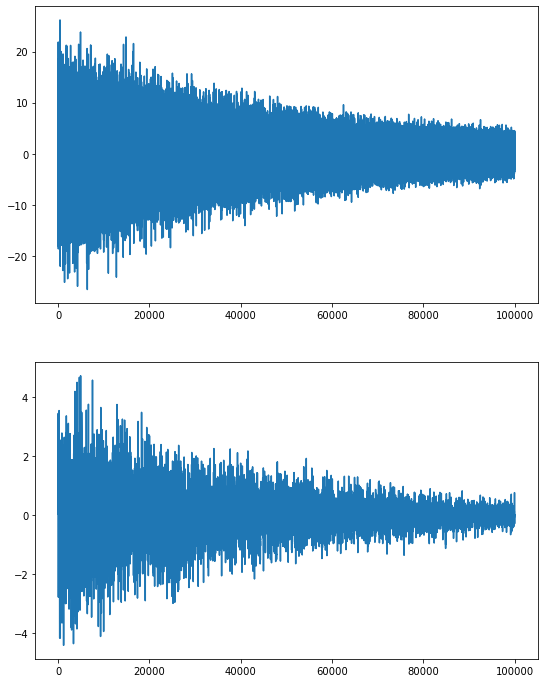

In [4]:
filtered = cusignal.convolve(data, window, method=method)  / cp.sum(window)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(filtered))


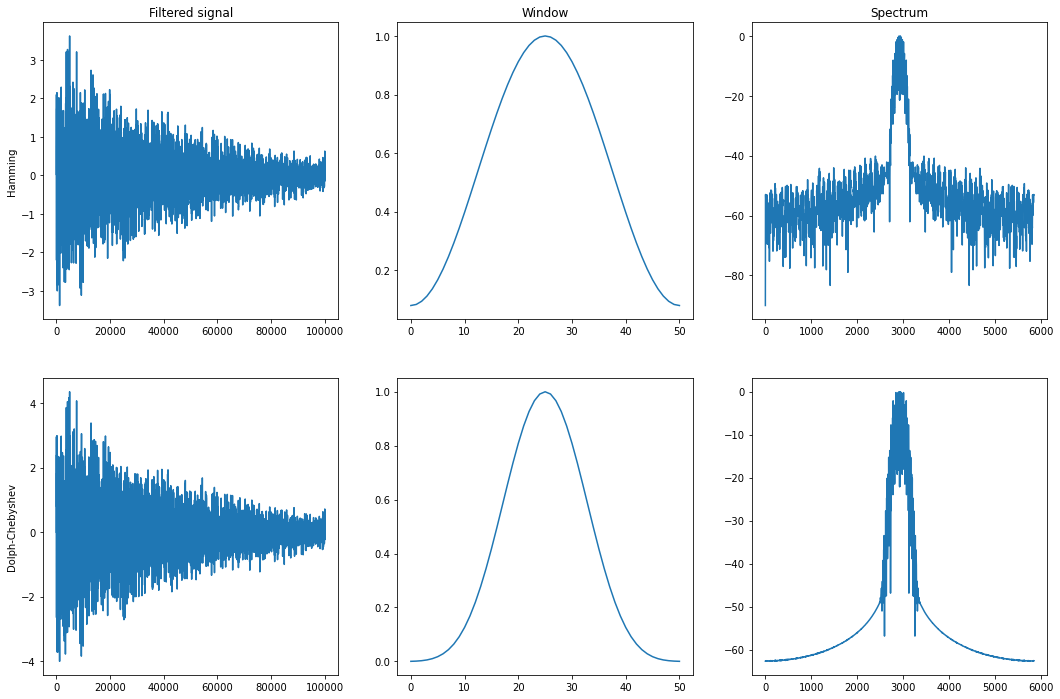

In [5]:
window_hamming = cusignal.hamming(51)
window_chebwin = cusignal.chebwin(51, at=100)

filtered_hamming = cusignal.convolve(
    data
    , window_hamming
    , method='fft'
) / cp.sum(window_hamming)

filtered_chebwin = cusignal.convolve(
    data
    , window_chebwin
    , method='fft'
) / cp.sum(window_chebwin)

A = fft(filtered_hamming, 2048) / (len(filtered_hamming)/2.0)
# freq = cp.linspace(-0.5, 0.5, len(A))
response_hamming = 20 * cp.log10(cp.abs(fftshift(A / cp.abs(A).max())))

A = fft(filtered_chebwin, 2048) / (len(filtered_chebwin)/2.0)
# freq = cp.linspace(-0.5, 0.5, len(A))
response_chebwin = 20 * cp.log10(cp.abs(fftshift(A / cp.abs(A).max())))

values      = np.arange(int(2048))
timePeriod  = 3500/fs
frequencies = values/timePeriod


fig, axes = plt.subplots(2,3, figsize=(18,12))
axes[0][0].plot(cp.asnumpy(filtered_hamming))
axes[0][0].set_title('Filtered signal')
axes[0][0].set_ylabel('Hamming')
axes[0][1].plot(cp.asnumpy(window_hamming))
axes[0][1].set_title('Window')
axes[0][2].plot(cp.asnumpy(frequencies), cp.asnumpy(response_hamming))
axes[0][2].set_title('Spectrum')

axes[1][0].plot(cp.asnumpy(filtered_chebwin))
axes[1][0].set_ylabel('Dolph-Chebyshev')
axes[1][1].plot(cp.asnumpy(window_chebwin))
axes[1][2].plot(cp.asnumpy(frequencies),cp.asnumpy(response_chebwin))

plt.savefig('FilteredSignal.png', dpi=150)

#### cusignal.convolution.convolve.fftconvolve()

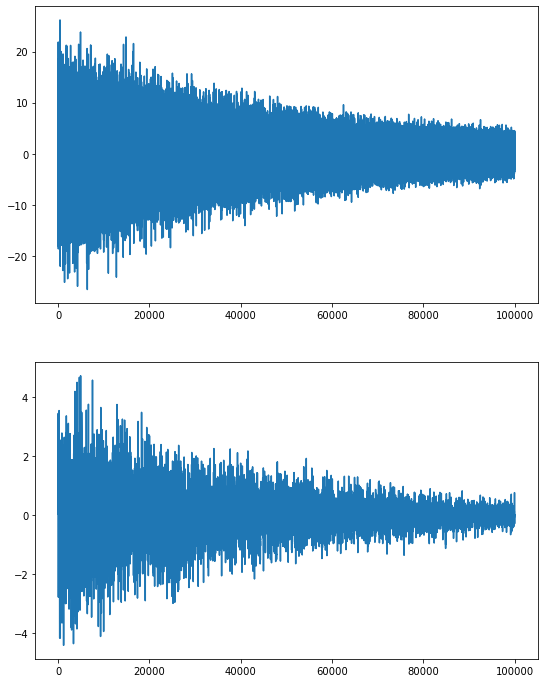

In [6]:
filtered = cusignal.fftconvolve(data, window)  / cp.sum(window)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(filtered))

#### cusignal.convolution.correlate.correlate()

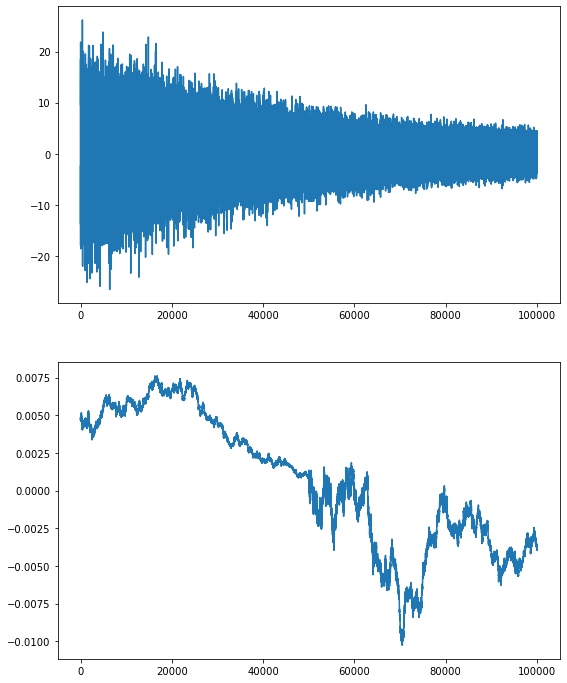

In [7]:
corr = cusignal.correlate(data, cp.ones(len(data)), mode='same') / len(data)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(corr))

#### cusignal.peak_finding.peak_finding.argrelextrema()

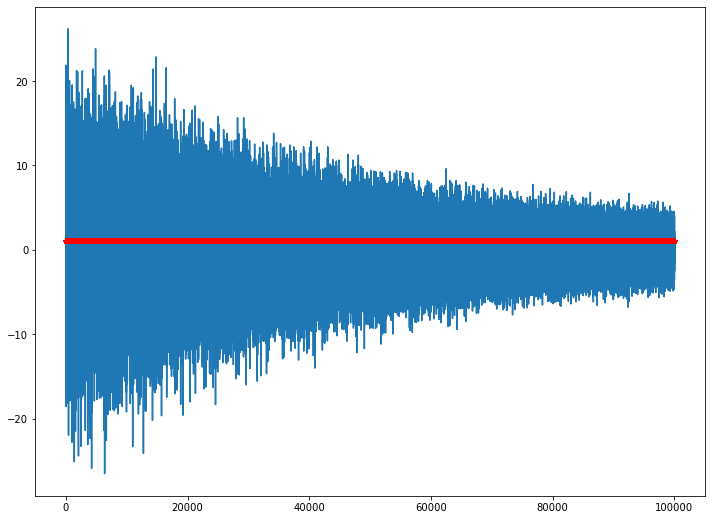

In [8]:
extrema = cusignal.argrelextrema(data, comparator=cp.less)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.peak_finding.peak_finding.argrelmax()

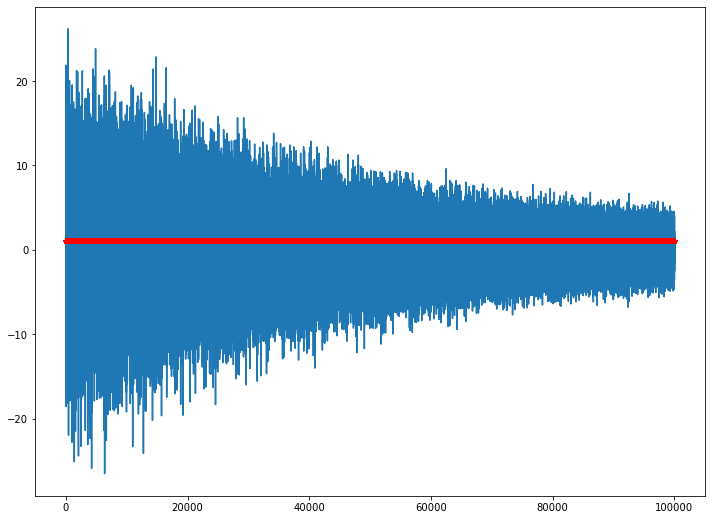

In [9]:
extrema = cusignal.argrelmax(data)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.peak_finding.peak_finding.argrelmin()

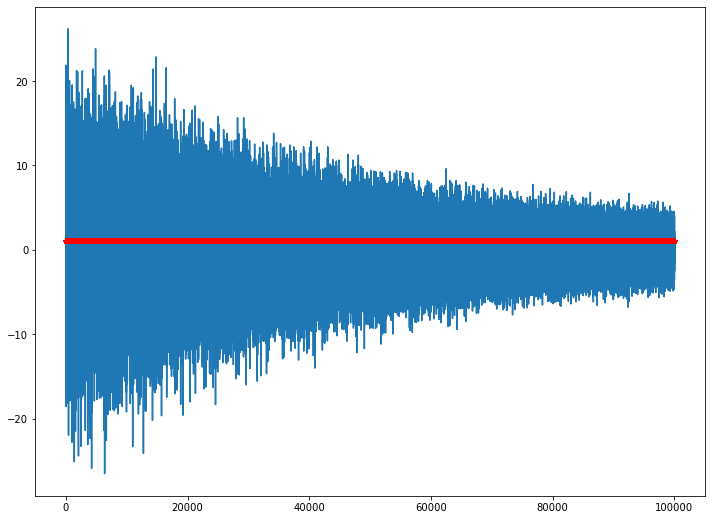

In [10]:
extrema = cusignal.argrelmin(data)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.waveforms.waveforms.chirp()

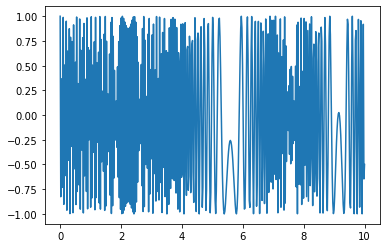

In [11]:
t = cp.linspace(0, 10, 500)

signal = cusignal.chirp(
    t
    , 120
    , 20
    , 500
    , method='quadratic'
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.gausspulse()

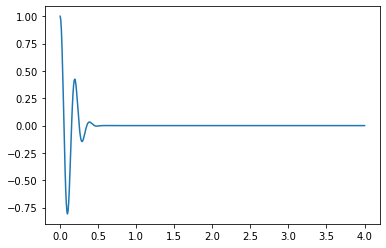

In [12]:
t = cp.linspace(0, 4, 500)

signal = cusignal.gausspulse(
    t
    , fc=5
    , bw=0.5
    , bwr= -6
    , tpr= -60
    , retquad=False
    , retenv=False
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.square()

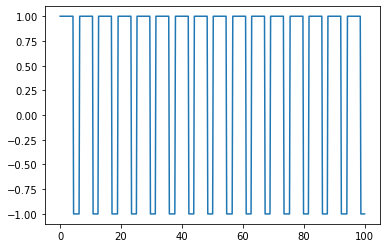

In [13]:
t = cp.linspace(0, 100, 500)

signal = cusignal.square(
    t
    , duty = 0.7
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.unit_impulse()

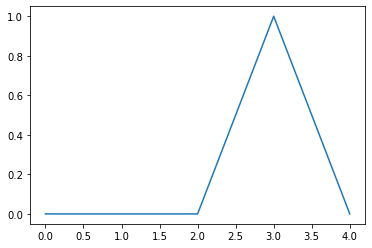

In [14]:
signal = cusignal.unit_impulse(5,3)

### Plot
plt.plot(cp.asnumpy(signal))